Introduction

In [10]:
print("Hello")

Hello


In [11]:
print("Howdy")

Howdy


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Given data
u = np.array([4.44, 4.01, 3.53, 3.05, 2.63, 2.11, 1.57, 0.93, 0])
E = np.array([6.79, 6.73, 6.65, 6.57, 6.48, 6.38, 6.24, 6.04, 5.56])

# To store RMSE values
rmse_values = []

# Polynomial fitting and RMSE calculation for degrees 1 to 8
for degree in range(1, 9):
    poly = PolynomialFeatures(degree)
    u_poly = poly.fit_transform(u.reshape(-1, 1))
    
    model = LinearRegression()
    model.fit(u_poly, E)
    
    E_pred = model.predict(u_poly)
    rmse = np.sqrt(mean_squared_error(E, E_pred))
    rmse_values.append(rmse)

# Find the degree with the least RMSE
min_rmse_degree = np.argmin(rmse_values) + 1

print(min_rmse_degree)


8


In [3]:
anscs=((1170*-393546)+(2170*-241845))-((2255*205.043)+(900*-74831)+(50*-84667)+(30*-103847)+(20*-124733))
print(anscs)

-908523521.965


In [10]:
kajd=(2170*(43.874))+(1170*(56.205))+(8478.8*(33.707))
kajd1=(2170*(-241845+43.874*(-298)))+(1170*(-393546+56.205*(-298)))+(8478.8*(0+33.707*(-298)))
kajd2=(2170*(-241845))+(1170*(-393546))+(8478.8*(0))
print(kajd)
print(kajd1)
print(kajd2)

446761.3416
-1118387349.7968001
-985252470.0


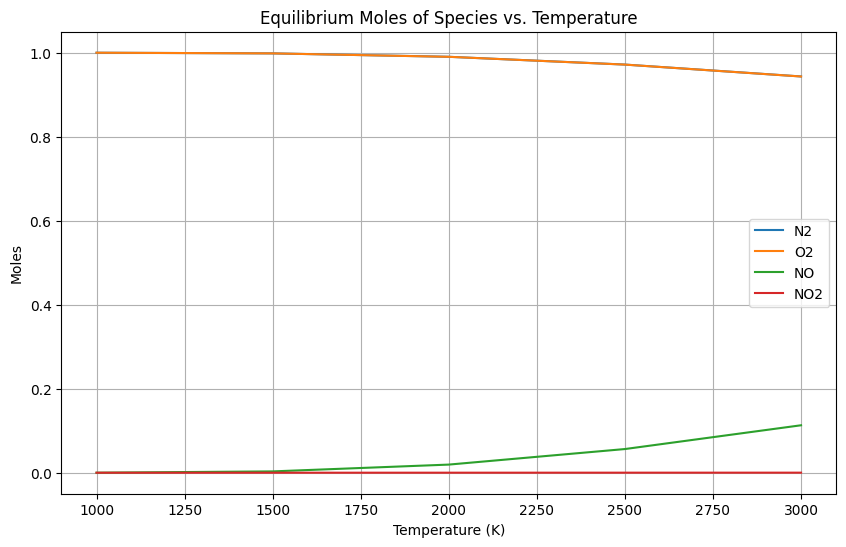

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314  # J/mol·K
T_range = np.arange(1000, 3500, 500)  # Temperature range in Kelvin

# Thermodynamic data (assumed values, replace with actual data)
delta_H_f = {'N2': 0, 'O2': 0, 'NO': 90250, 'NO2': 33180}  # J/mol
S0 = {'N2': 191.5, 'O2': 205.0, 'NO': 210.7, 'NO2': 240.0}  # J/mol·K

def gibbs_free_energy(T, species):
    return delta_H_f[species] - T * S0[species]

# Equilibrium constant calculation
def equilibrium_constant(T, delta_G0):
    return np.exp(-delta_G0 / (R * T))

# Initialize results
moles_N2 = []
moles_O2 = []
moles_NO = []
moles_NO2 = []

for T in T_range:
    # Gibbs free energy changes
    delta_G0_1 = gibbs_free_energy(T, 'NO') * 2 - gibbs_free_energy(T, 'N2') - gibbs_free_energy(T, 'O2')
    delta_G0_2 = gibbs_free_energy(T, 'NO2') - gibbs_free_energy(T, 'NO') - 0.5 * gibbs_free_energy(T, 'O2')
    
    # Equilibrium constants
    Kp1 = equilibrium_constant(T, delta_G0_1)
    Kp2 = equilibrium_constant(T, delta_G0_2)
    
    # Initial guesses
    x = 0.1  # Initial guess for NO
    y = 0.01  # Initial guess for NO2
    
    # Iterative solution to find equilibrium moles
    for _ in range(1000):  # Iteration loop
        f1 = x ** 2 / ((1 - x/2) * (1 - x/2)) - Kp1  # Reaction 1
        f2 = y / ((x - y) * np.sqrt(1 - x/2 - y/2)) - Kp2  # Reaction 2
        df1_dx = 2 * x / ((1 - x/2) ** 2)  # Derivative w.r.t x
        df2_dy = 1 / ((x - y) * np.sqrt(1 - x/2 - y/2))  # Derivative w.r.t y
        
        # Newton-Raphson update
        x -= f1 / df1_dx
        y -= f2 / df2_dy
    
    moles_N2.append(1 - x/2)
    moles_O2.append(1 - x/2 - y/2)
    moles_NO.append(x - y)
    moles_NO2.append(y)

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(T_range, moles_N2, label='N2')
plt.plot(T_range, moles_O2, label='O2')
plt.plot(T_range, moles_NO, label='NO')
plt.plot(T_range, moles_NO2, label='NO2')
plt.xlabel('Temperature (K)')
plt.ylabel('Moles')
plt.title('Equilibrium Moles of Species vs. Temperature')
plt.legend()
plt.grid(True)
plt.show()
